In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Part C

There are two different temperature evolutions we need to use here: one for the air parcel and one for the environment.

<ul>
    <li>The temperature evolution of the <b> environment </b> is given by $\partial T_{env}/\partial p$ stated in the problem </li>
    
  <li>The temperature evolution of the <b> air parcel </b> is given by the fact that the air particle moves adiabatically, through the air, exchanging no heat with the environment. In other words, 
    $$T_{ap}=T_{ap}^{(0)}\left(\frac{p_{ap}}{p_{ap}^{(0)}}\right)^{1-1/\gamma}$$ </li>
    
where the $(0)$ represents some reference point.
</ul>

In [2]:
T0 = 273.15+25; p0 = 1013;
pC = 800

r1 = 0.06; r2 = 0.11;
def T_env(p):
    dp = p-p0
    return T0+ np.piecewise(p, [p >= pC, p < pC],
                            [lambda p: r2*(p-p0), lambda p: r2*(pC-p0)+r1*(p-pC)])

gam = 7/5
def T_ap(p):
    return T0*(p/p0)**(1-1/gam)

Create array of pressures and temperatures for the environment and the air parcel.

In [3]:
pf = 600

pp = np.linspace(p0, pf, 1000)
TT_env = T_env(pp)
TT_ap = T_ap(pp)

#Find the pressure where these are equal
i = np.argmin(abs(TT_env[3::]-TT_ap[3::]))
p_LNB = pp[i+3]

Plot temperature as a function of pressire for the air parcel and the environment.

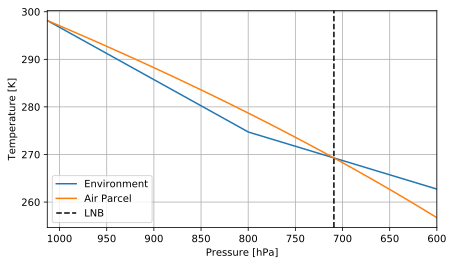

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.plot(pp, TT_env, label='Environment')
ax.plot(pp, TT_ap, label='Air Parcel')
ax.axvline(p_LNB, c='k', ls='--', label='LNB')

ax.set_xlim(p0, pf)
ax.set_ylabel('Temperature [K]')
ax.set_xlabel('Pressure [hPa]')
ax.grid()
ax.legend()

plt.show()

The pressure at the LNB is $p=710.4$hPa and the pressure at the LFC is $p=1013$hPa (LFC occurs at the surface).

Now we need to compute the work using

$$W=\frac{R}{m}\int_{p_2}^{p_1} \frac{T_{ap}-T_{env}}{p}dp $$

We have $T_{ap}$ and $T_{env}$ defined as functions of $p$, so this shouldn't be too bad.

**For the CAPE**: $p_1$ corresponds to the LFC (the surface) and $p_2$ corresponds to the LNB 

**For the CN**: $p_1$ corresponds to the surface and $p_2$ corresponds to the LFC (the surface).

In [5]:
def work_integrand(p):
    return (R/m)*(T_ap(p)-T_env(p))/p

In [6]:
R = 8.314; m=28/1000

p_CAPE = np.linspace(p0, p_LNB, 1000) # compute values to integrate over
CAPE1 = np.trapz(work_integrand(p_CAPE), p_CAPE)
CN1 = 0

print(CAPE1) #print the integral
print(CN1) #print the integral

-236.53702578843337
0


The CAPE is thus $-236.5$J and the CIN is $0$J.

# Part D

We need to redefine the "T_env" function.

In [7]:
r1 = -0.04; r2 = 0.14; r3=0.09
pC1 = 970; pC2 = 700
def T_env(p):
    dp = p-p0
    return T0+ np.piecewise(p, [p > pC1, (p < pC1) & (p > pC2), p < pC2 ],
                            [lambda p: r1*(p-p0),
                             lambda p: r1*(pC1-p0)+r2*(p-pC1),
                             lambda p: r1*(pC1-p0)+r2*(pC2-pC1)+r3*(p-pC2)])

Obtain the pressure and temperature arrays and find the locations of the LNB and LFC.

In [8]:
pf = 350

pp = np.linspace(p0, pf, 1000)
TT_env = T_env(pp)
TT_ap = T_ap(pp)

#Find the pressure where these are equal
i = np.argmin(abs(TT_env[500::]-TT_ap[500::]))
p_LNB = pp[i+500]

#Find the pressure where these are equal
i = np.argmin(abs(TT_env[10:500]-TT_ap[10:500]))
p_LFC = pp[i+10]

Plot

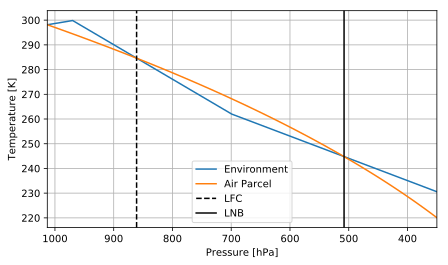

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax.plot(pp, TT_env, label='Environment')
ax.plot(pp, TT_ap, label='Air Parcel')
ax.axvline(p_LFC, c='k', ls='--', label='LFC')
ax.axvline(p_LNB, c='k', ls='-', label='LNB')

ax.set_xlim(p0, pf)
ax.set_ylabel('Temperature [K]')
ax.set_xlabel('Pressure [hPa]')
ax.grid()
ax.legend()

plt.show()

In [10]:
print(p_LNB)
print(p_LFC)

507.9519519519519
861.021021021021


The pressure at the LNB is $p=508.0$hPa and the pressure at the LFC is $p=861.0$hPa.

In [11]:
R = 8.314; m=28/1000

p_CAPE = np.linspace(p_LFC, p_LNB, 1000) # compute values to integrate over
p_CIN = np.linspace(p0, p_LFC, 1000) # compute values to integrate over

CAPE2 = np.trapz(work_integrand(p_CAPE), p_CAPE)
CIN2 = np.trapz(work_integrand(p_CIN), p_CIN)

print(CAPE2) #print the integral
print(CIN2) #print the integral

-531.7288242494517
125.77281151217127


The CAPE is thus $-531.7$J and the CIN is $125.8$J.

# Part E

With the approximation that our gas is ideal, we have

$$KE=\frac{1}{2}mv^2 $$

Assuming that all the work done ($W \equiv$ work per unit mass) on the gas goes towards vertical velocity (which we will just call $w$) in the kinetic energy, we get

$$W=\frac{1}{2}{w}^2 \implies w_{max}=(2W)^{1/2}$$

In [12]:
print((-2*CAPE1)**(1/2)) #minus sign because we are now considering work done ON the parcel
print((-2*CAPE2)**(1/2))

21.75026555187009
32.61069837490303


In part C the maximum vertical velocity at the LNB is $21.8$m/s and in part D the maximum vertical velocity at the LNB is $32.6$m/s (assuming the particles have $\approx 0$ vertical velocity at the LFC.)